## Mean Shift 군집화

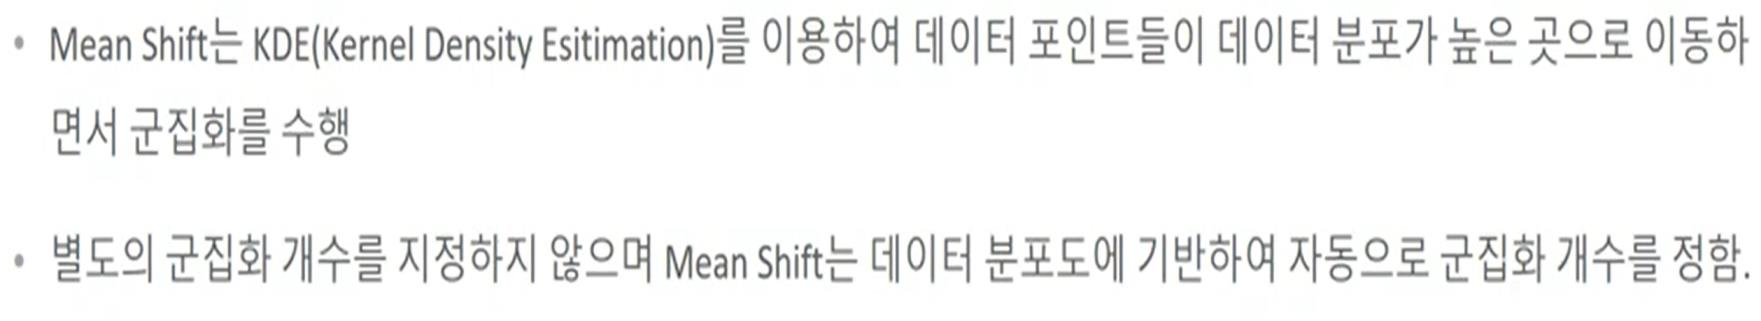

### Mean Shift 수행 절차

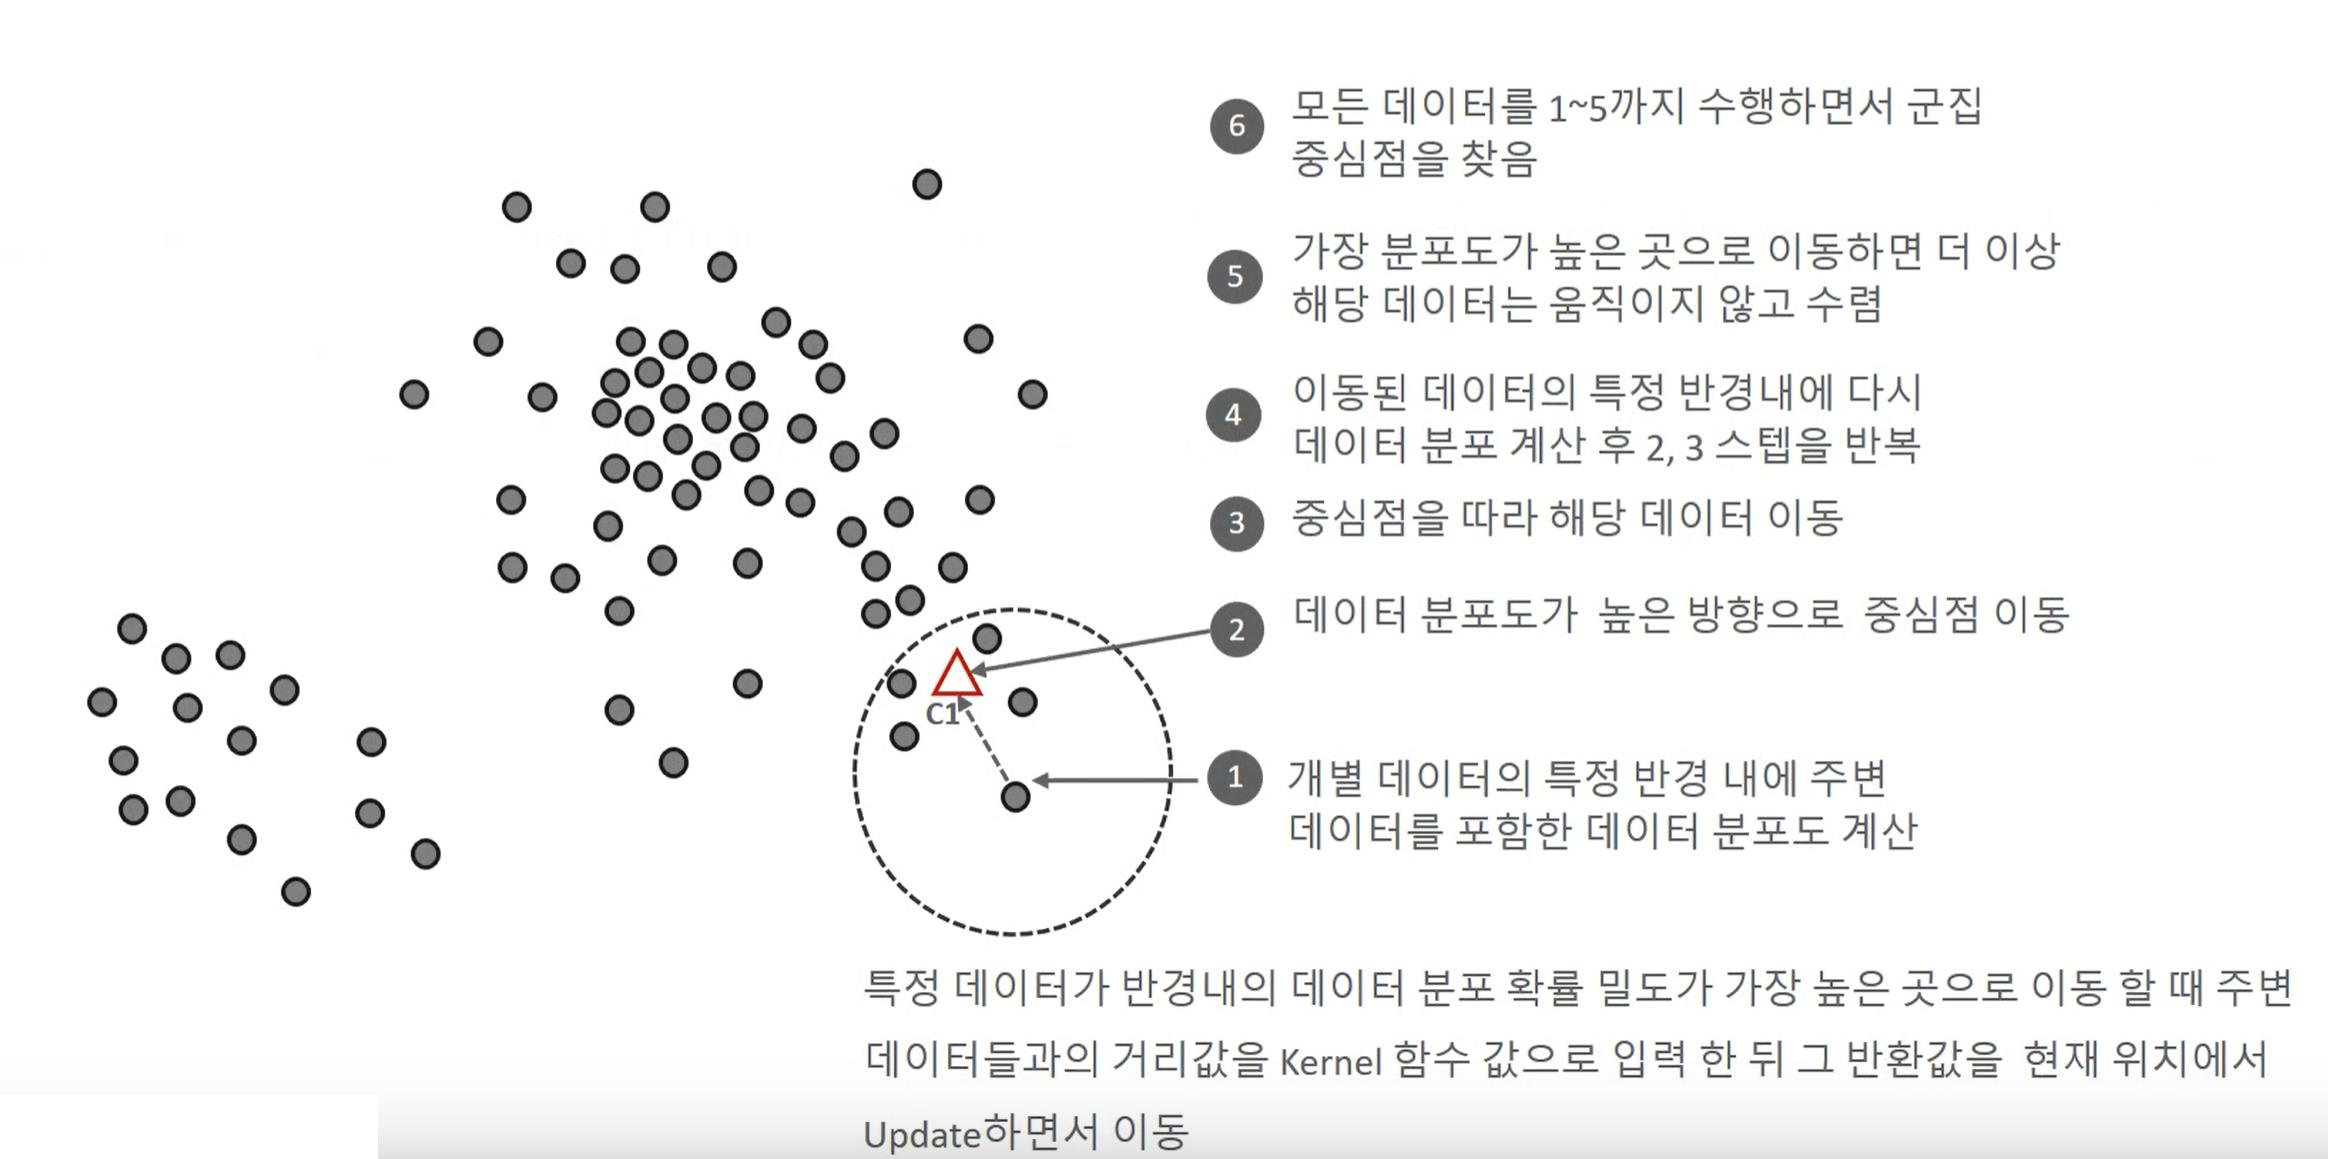

### KDE(Kernel Density Estimation) 

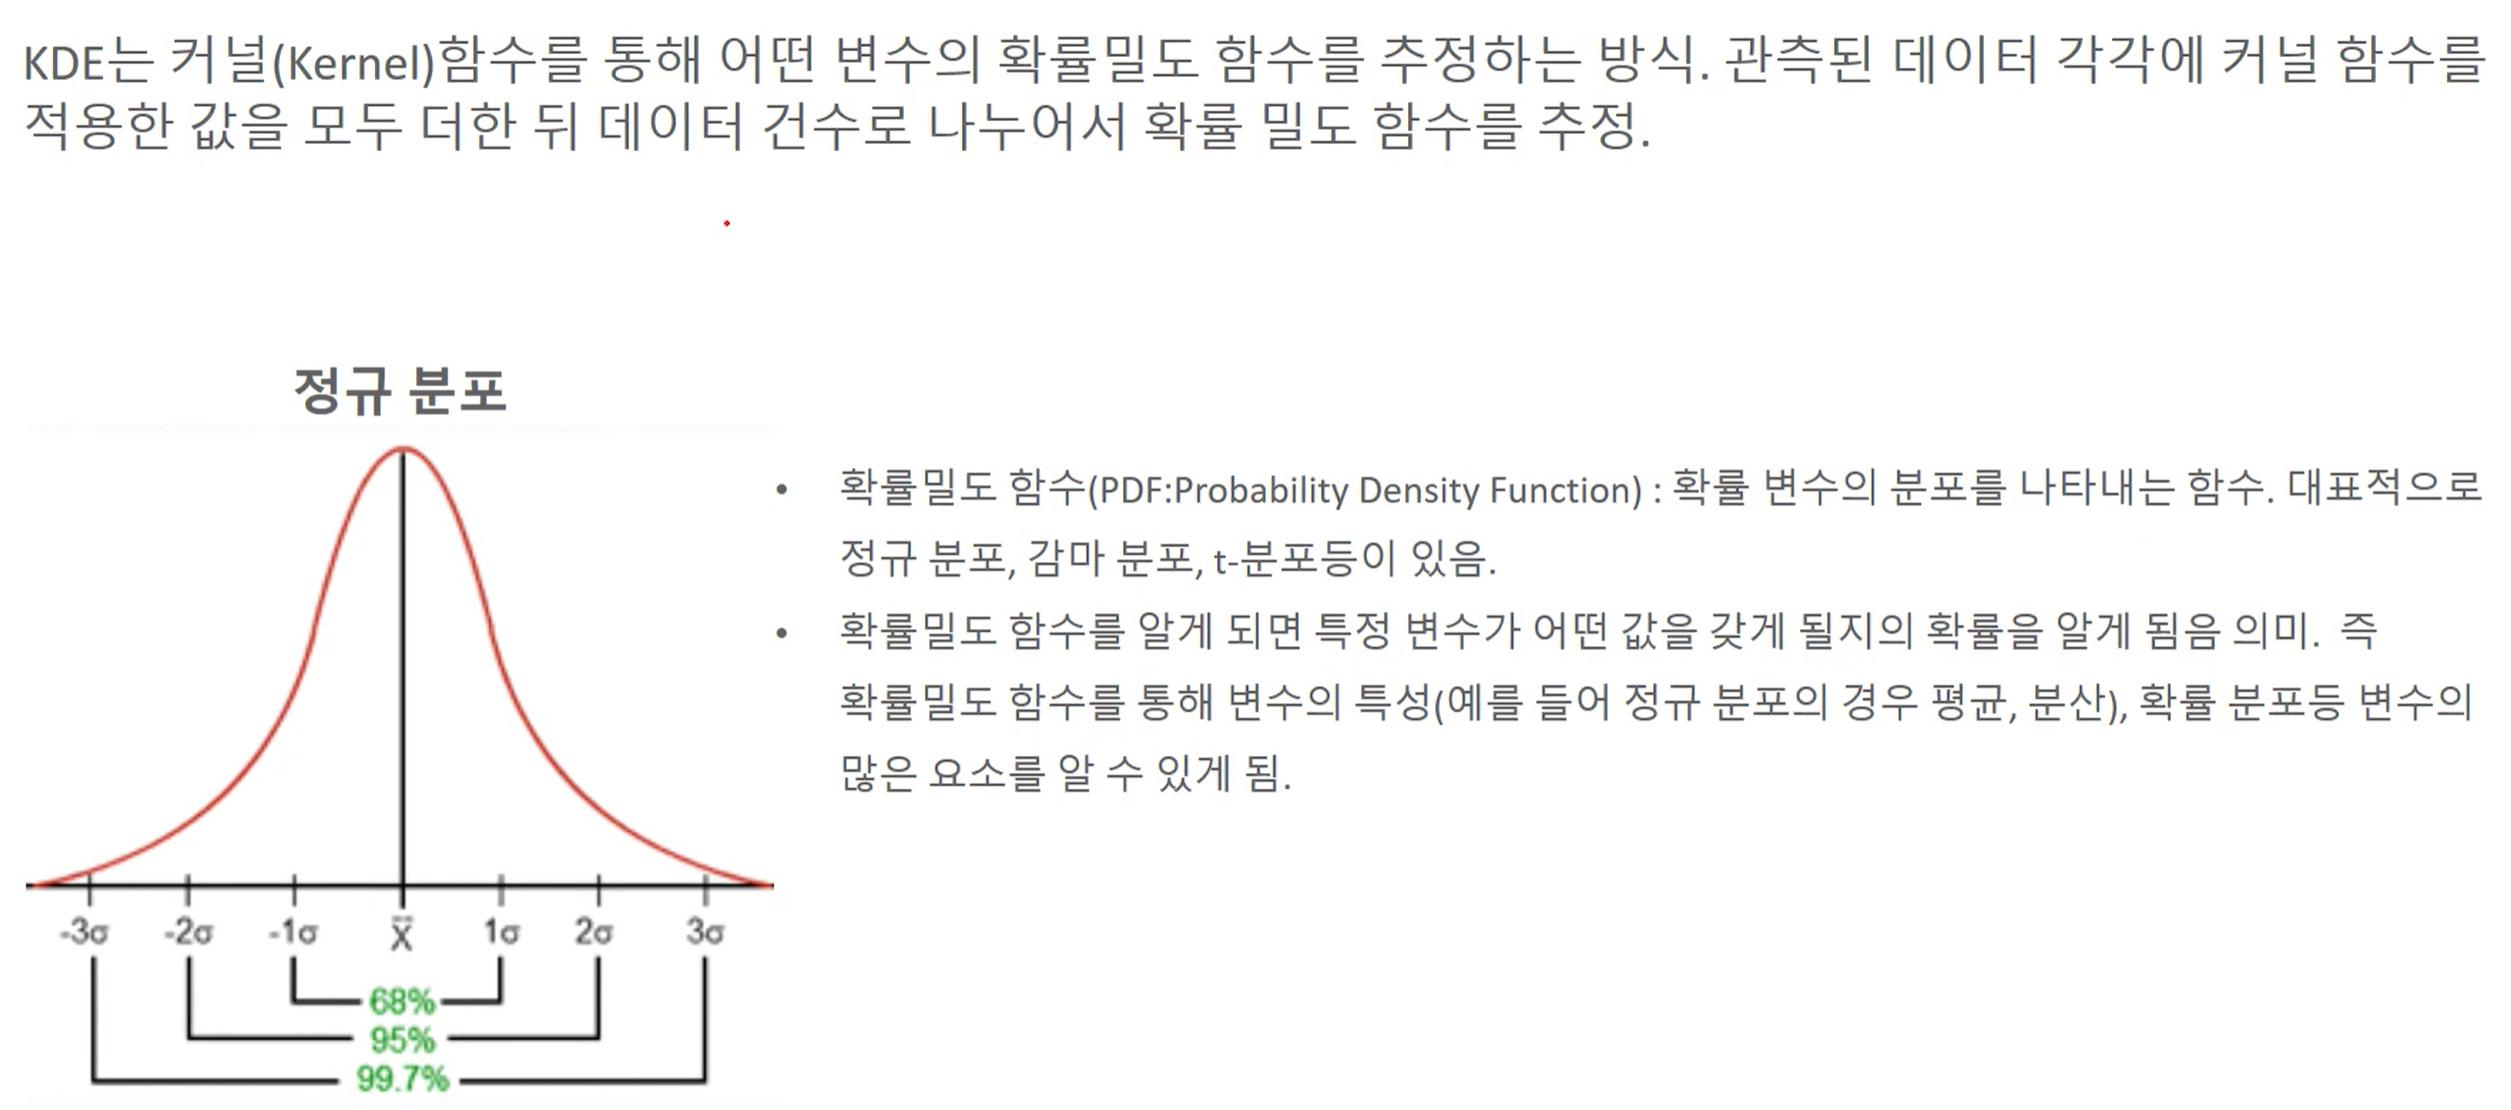

### 확률 밀도 추정 방법

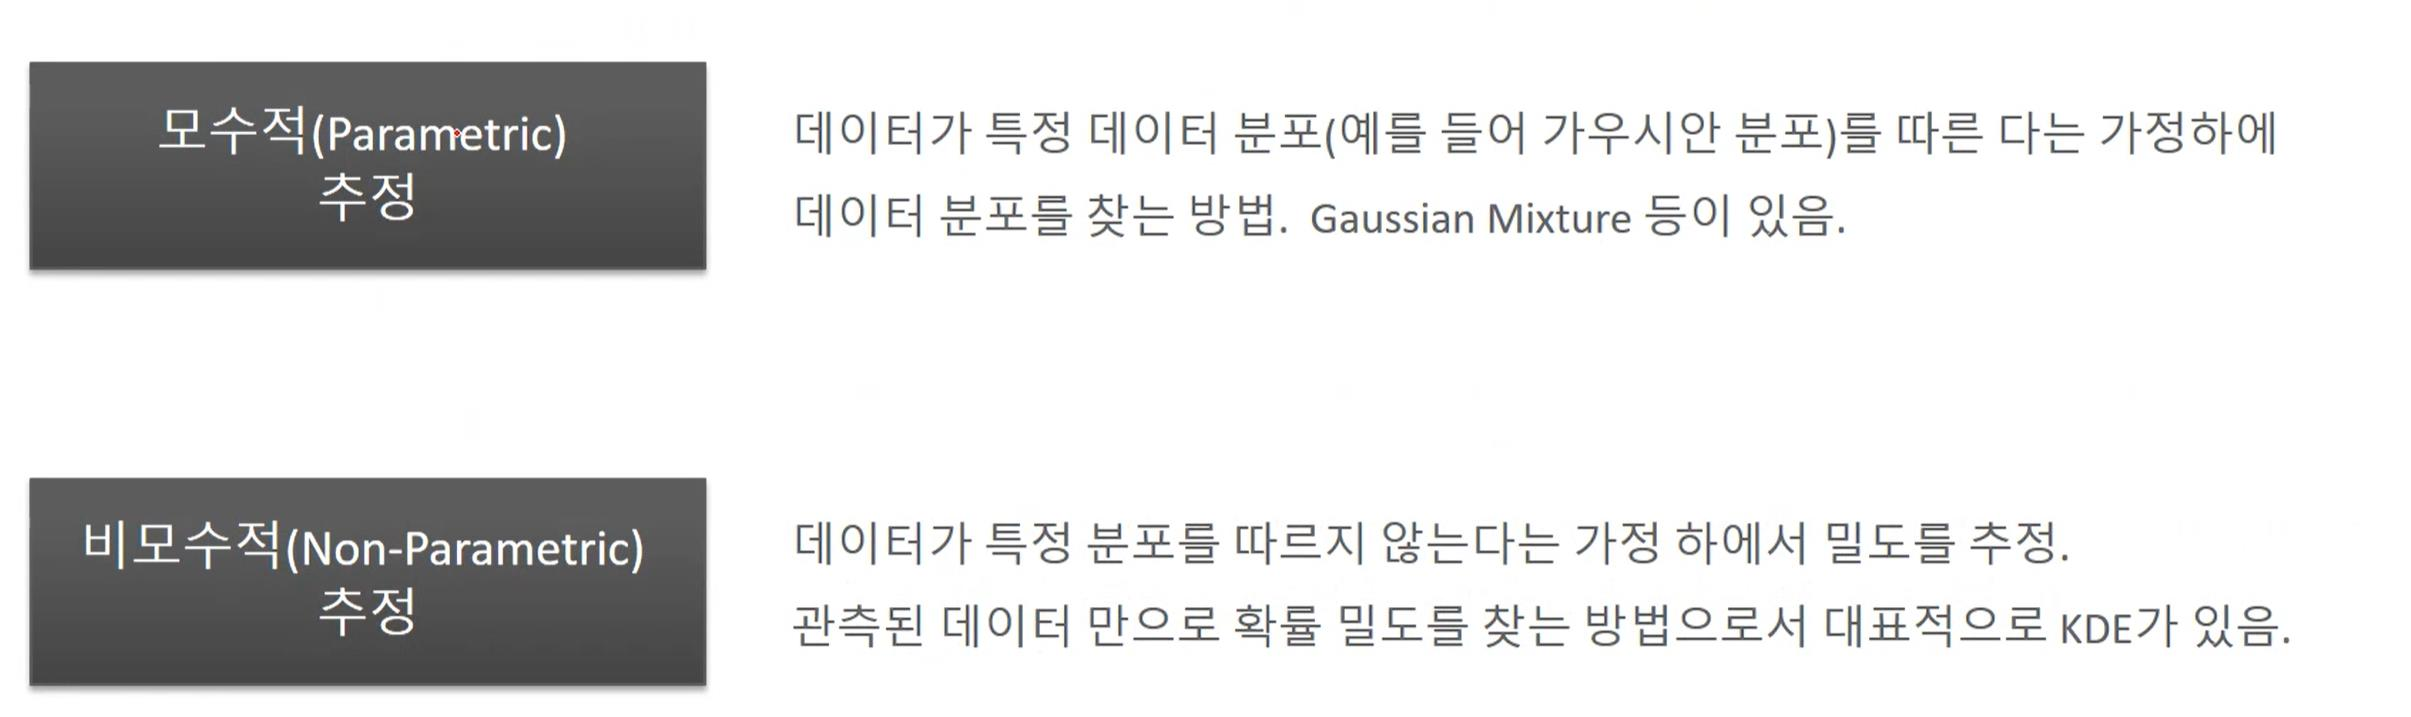

## 비모수적 밀도 추정 종류 2가지 방법

### 01_비모수적 밀도 추정 – 히스토그램 (Histogram)

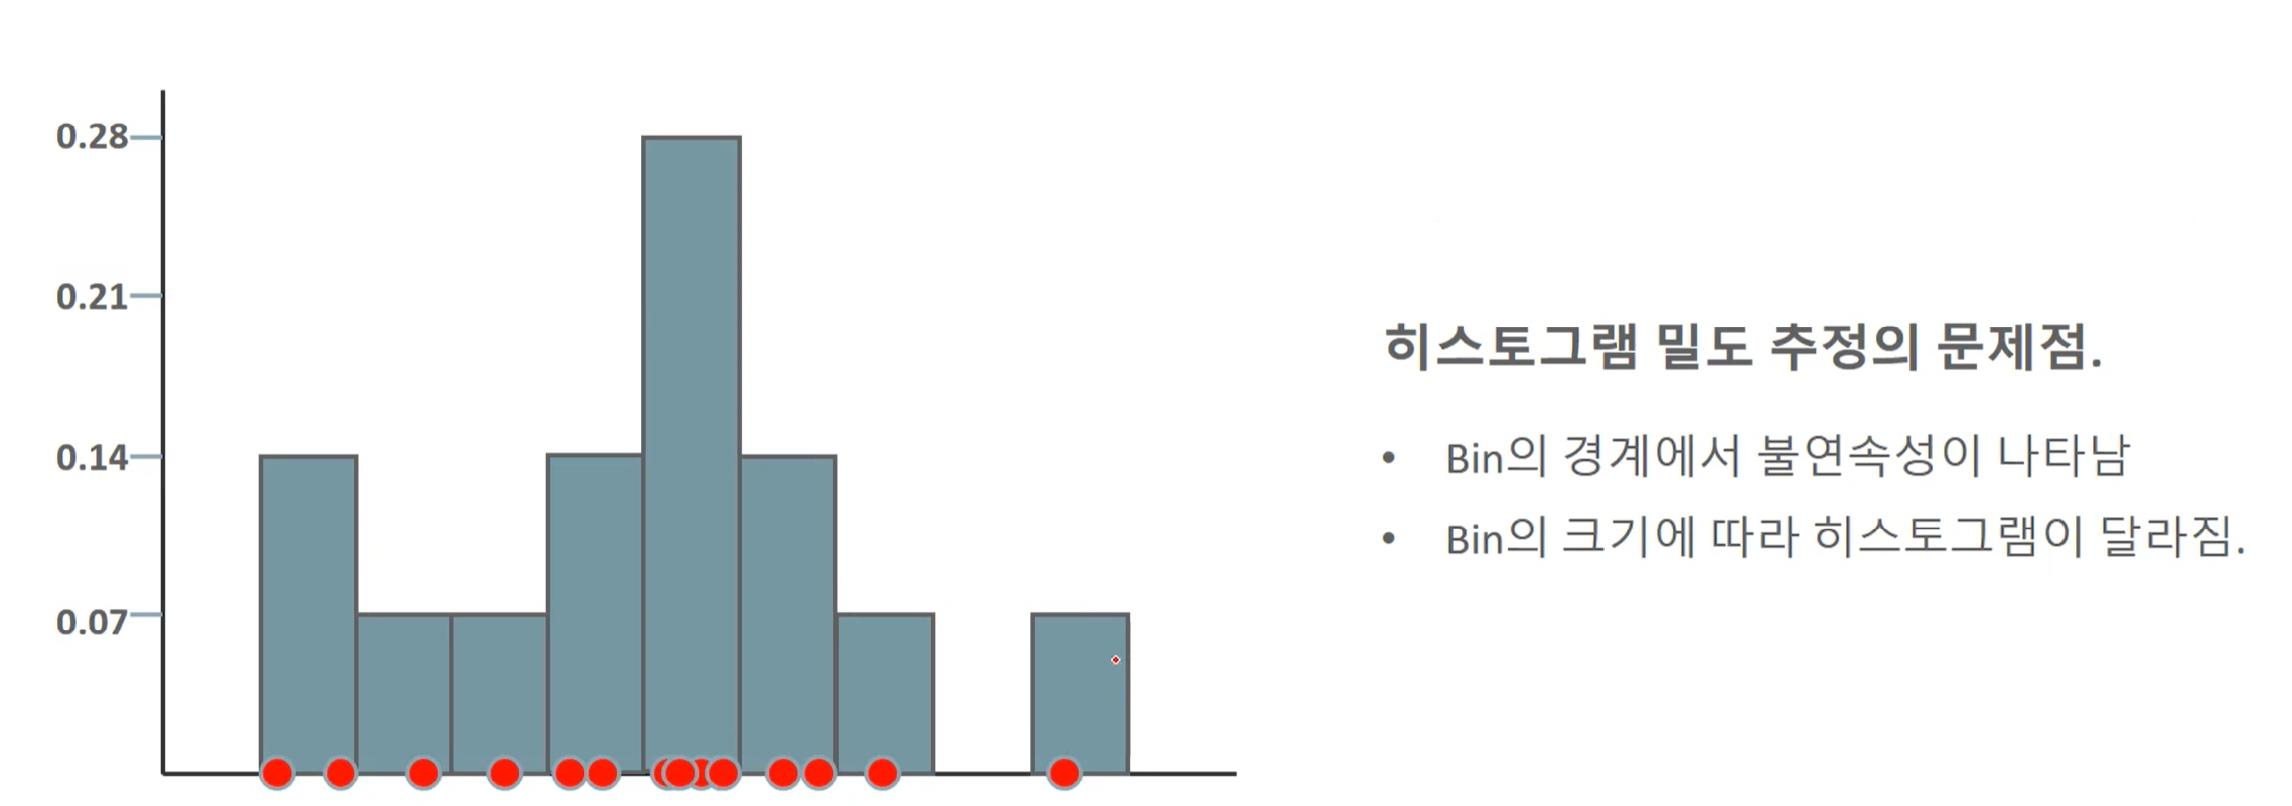

###  02_비모수적 밀도 추정 -KDE

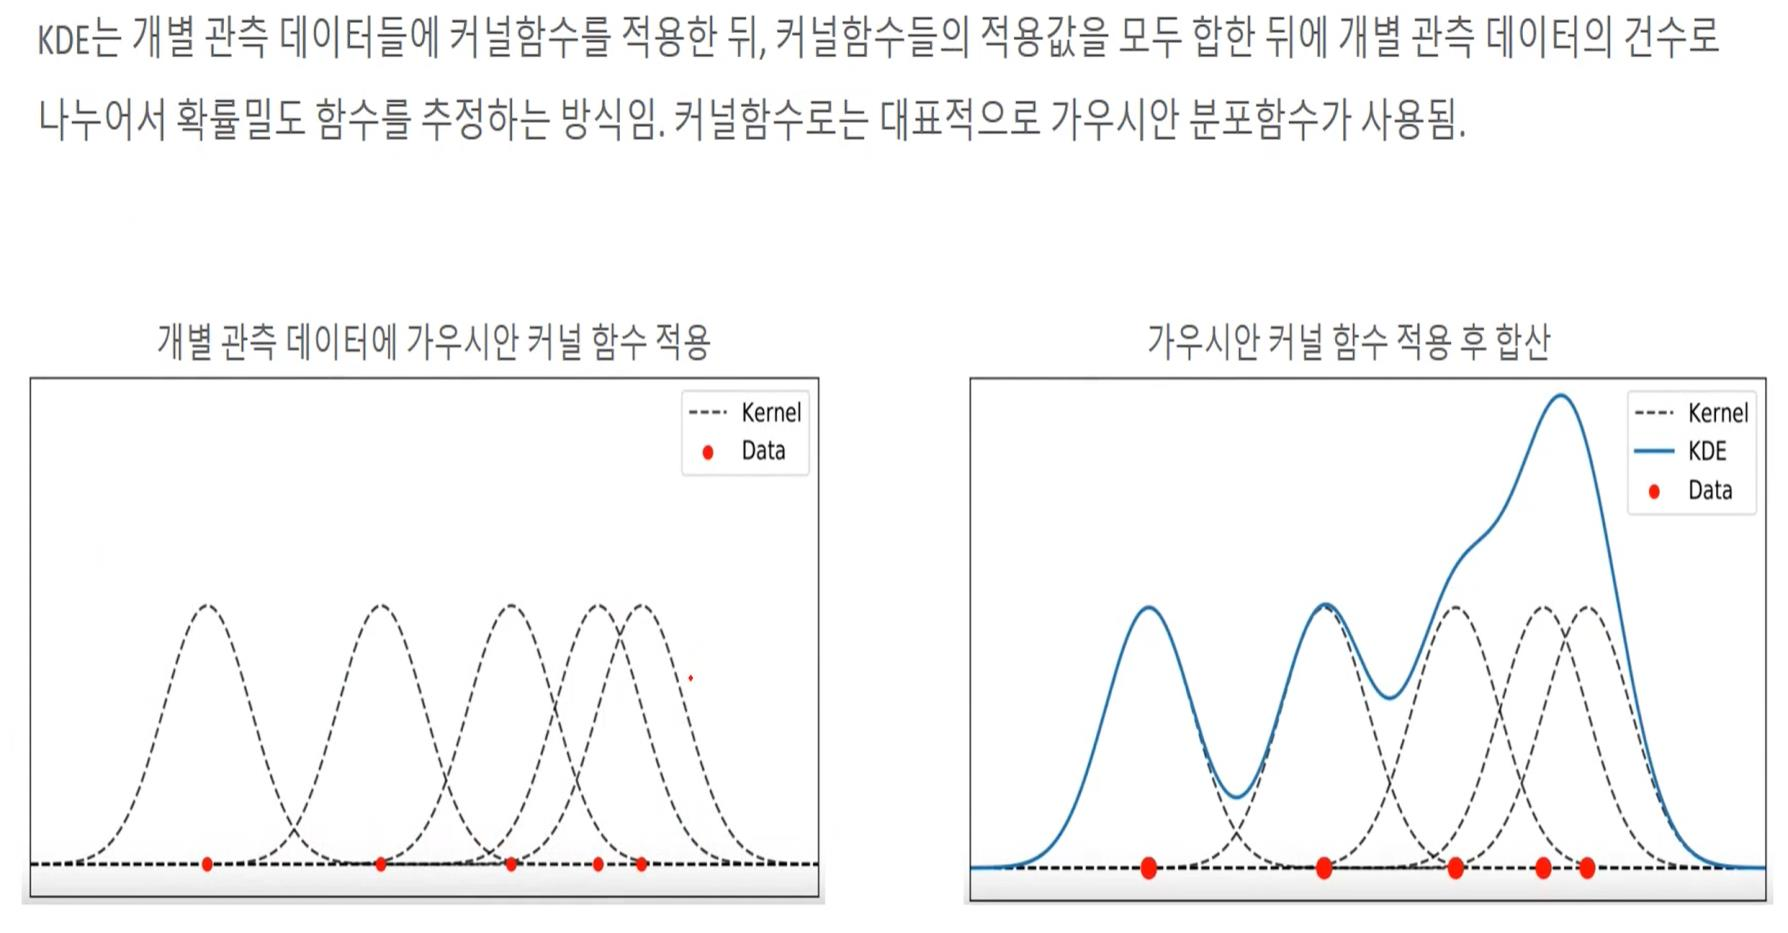

### Bandwidth에 따른 KDE의 변화

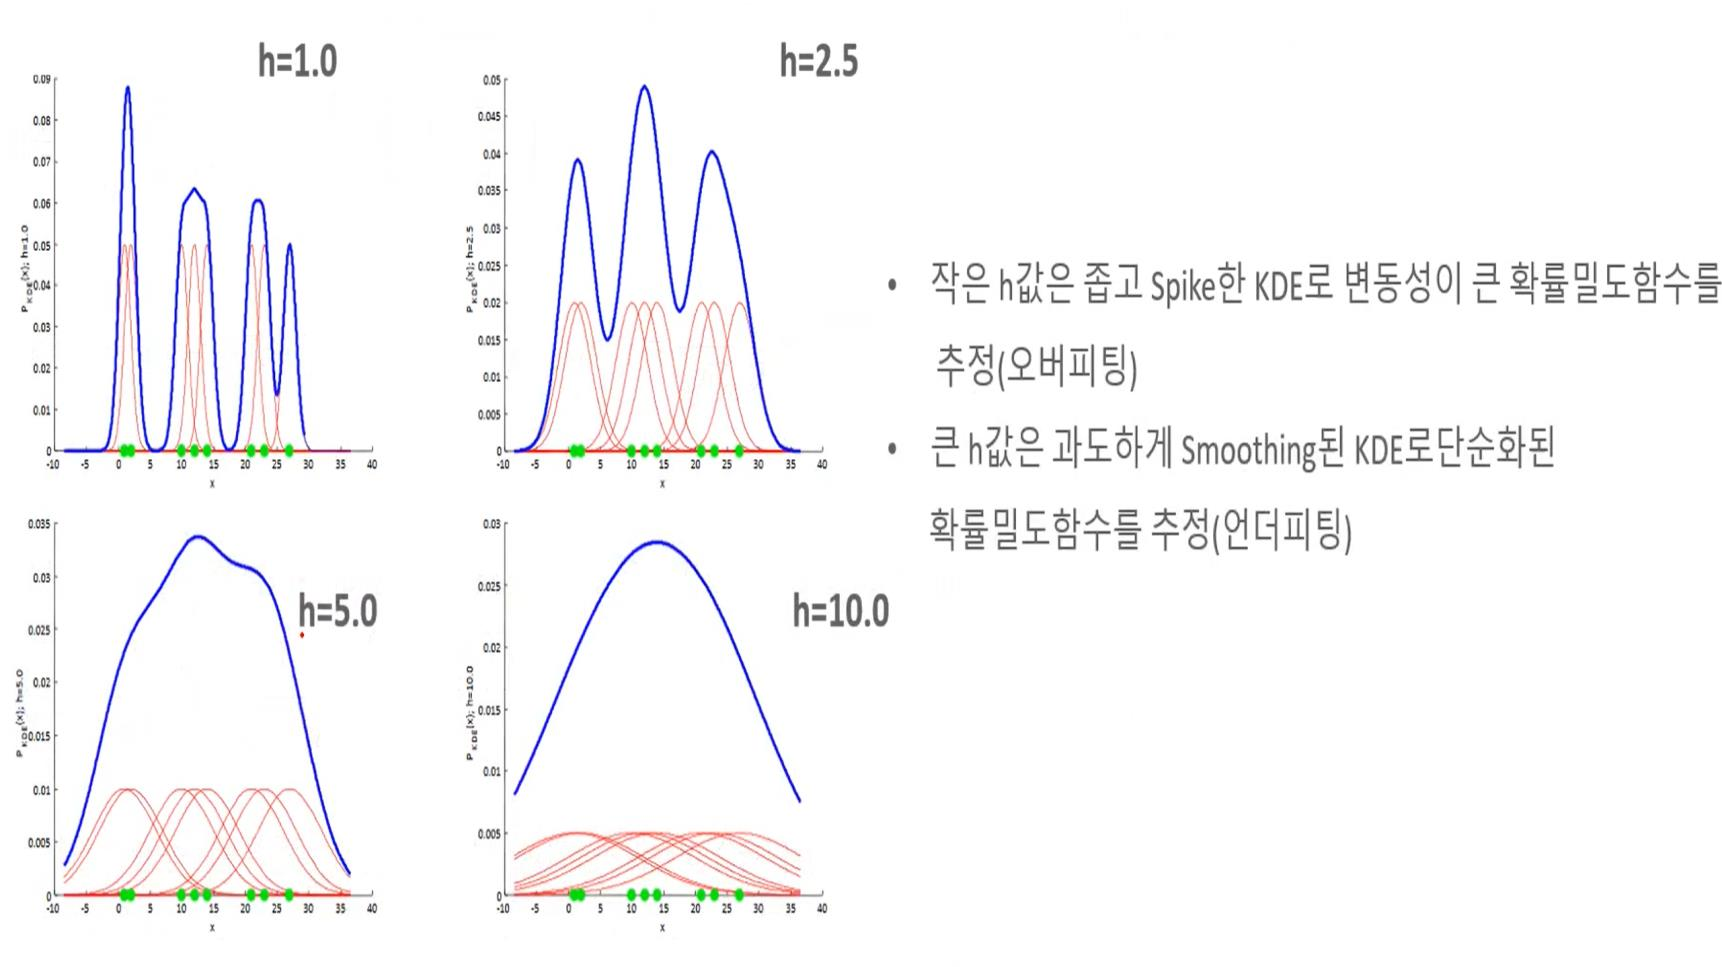

### Bandwidth에 따른 KDE의 변화

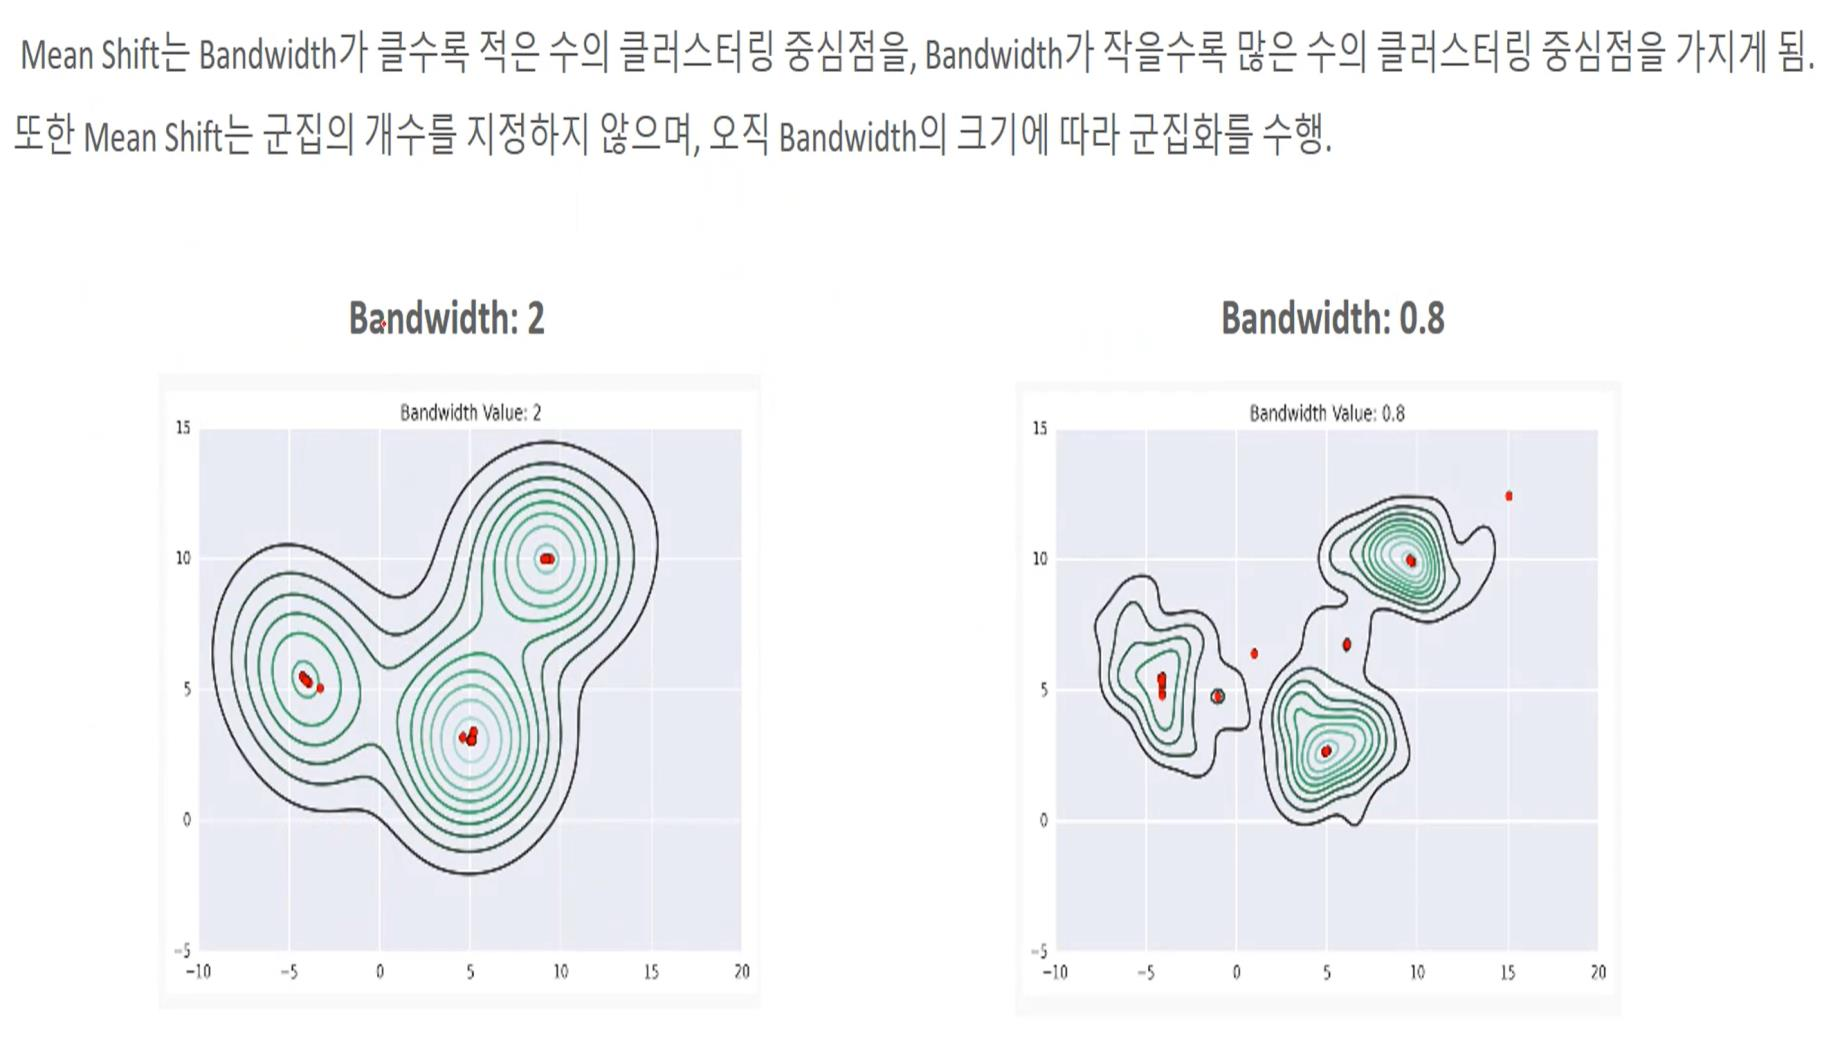

### 이걸 알아야 함수를 사용해서 데이터 입력 가능
## 사이킷런 Mean Shift

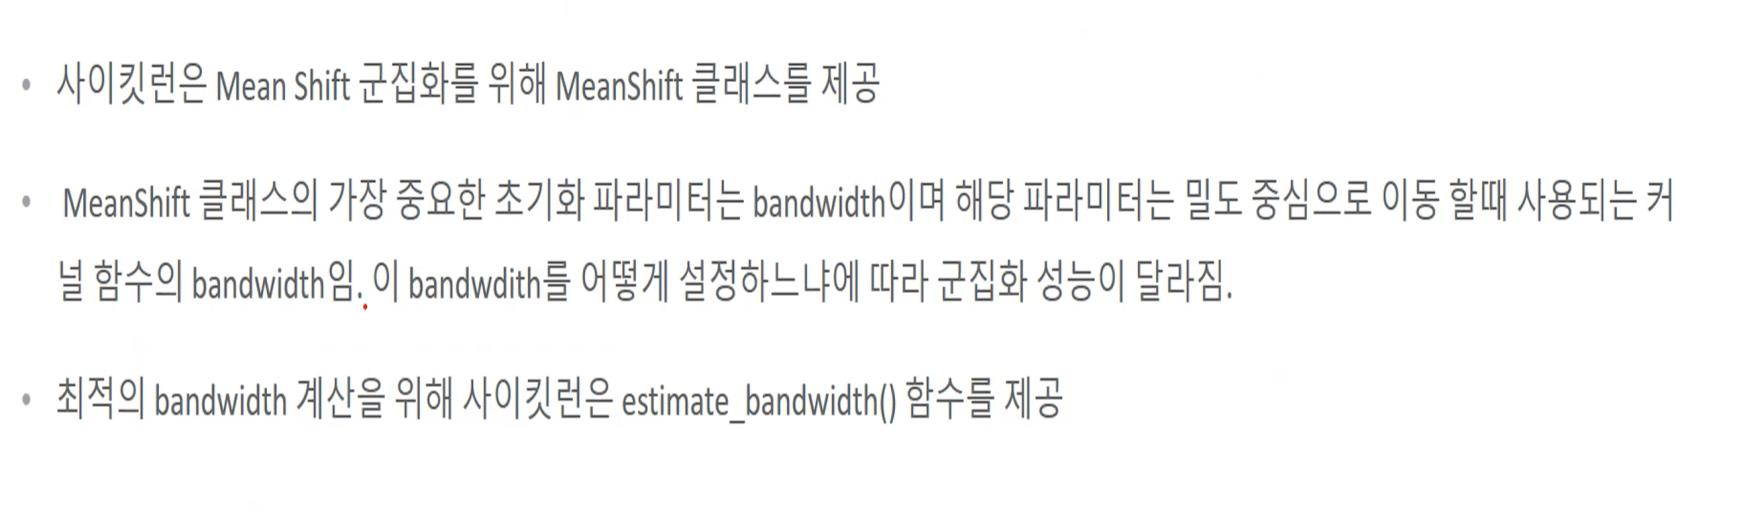

###  실습

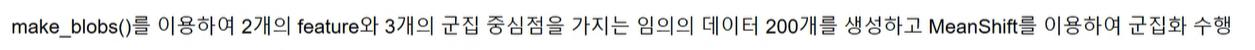

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200,n_features=2, centers=3,
                 cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형',np.unique(cluster_labels))

cluster labels 유형 [0 1 2 3 4 5]


#### 커널 함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재수행

In [4]:
meanshift = MeanShift(bandwidth=1)
cluster_labels =meanshift.fit_predict(X)
print('cluster labels 유형',np.unique(cluster_labels))

cluster labels 유형 [0 1 2]


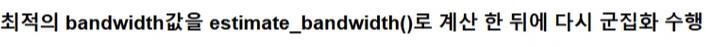

In [6]:
from sklearn.cluster import estimate_bandwidth

bandwidh =estimate_bandwidth(X)
print('bandwidth 값', round(bandwidh,3))

bandwidth 값 1.816


In [8]:
import pandas as pd

clusterDF =pd.DataFrame(data=X, columns=['ftr1','ftr2'])


clusterDF['target']=y
best_bandwidth= estimate_bandwidth(X)
meanshift =MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형',np.unique(cluster_labels))

cluster labels 유형 [0 1 2]


### 시각화

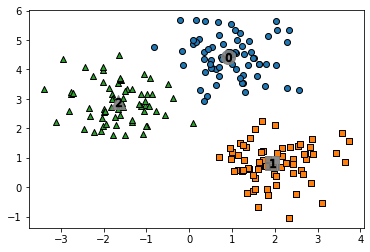

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [10]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
